In [16]:
import pickle
%matplotlib inline
from collections import defaultdict
import pylab as plt

In [34]:
def plot_clusters(path,pfile,csv_file):
    #pfile='downsample_syl_3_meta_200_421_pkl_part.pkl'
    #path='core_subdata/'
    part=pickle.load(open(path+pfile,'r'))
    clust=get_clusters(part)
    #csv_file='subdata/downsample_syl_3_meta_200_421.csv'
    ngram=csv_file.split('.')[0].split('_')[-1]
    csvdata=read_csv_data_meta(csv_file)
    for j in clust.keys():
        inds=clust[j]
        plt.figure()
        for i in inds:
            plt.plot(csvdata[i])
            plt.title(ngram+"|"+str(j))

# plotting all the subshape clusters by community detection from each n-gram data file

## 5 randomly sampled ngrams data have been selected to apply the community detection, here we see there results

--------- downsample_syl_3_meta_200_134_pkl_part.pkl
0 181
1 183
2 212
3 116
4 2
5 4
6 9
7 5
8 2
9 12
10 12
11 2
12 2
13 11
14 4
15 2
16 2
17 6
18 2
19 3
20 2
21 2
22 2
23 2
24 5
25 2
--------- downsample_syl_3_meta_200_314_pkl_part.pkl
0 85
1 119
2 154
3 17
4 168
5 175
6 11
7 2
8 11
9 2
10 3
11 2
12 4
--------- downsample_syl_3_meta_200_322_pkl_part.pkl
0 57
1 53
2 120
3 112
4 119
5 80
6 2
7 3
8 2
9 11
10 3
11 3
12 2
--------- downsample_syl_3_meta_200_342_pkl_part.pkl
0 82
1 136
2 38
3 173
4 2
5 58
6 5
7 172
8 9
9 12
10 2
11 6
12 3
13 3
14 7
15 2
16 2
17 2
18 2
19 4
20 2
21 2
22 3
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
--------- downsample_syl_3_meta_200_421_pkl_part.pkl
0 85
1 156
2 148
3 160
4 183
5 59
6 120
7 2
8 3
9 4
10 2
11 2
12 3
13 4
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 4
22 2


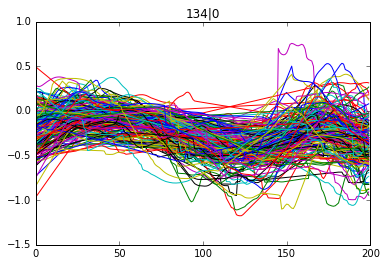

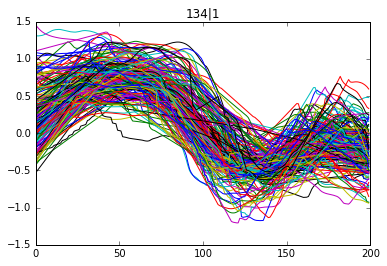

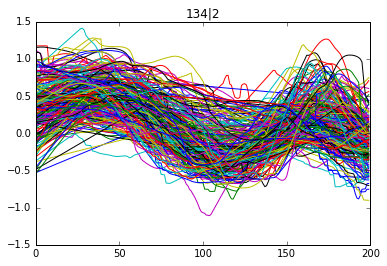

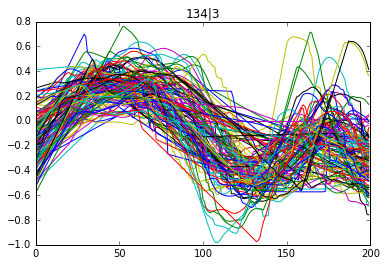

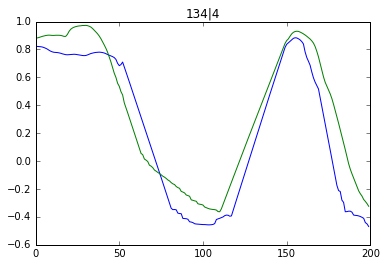

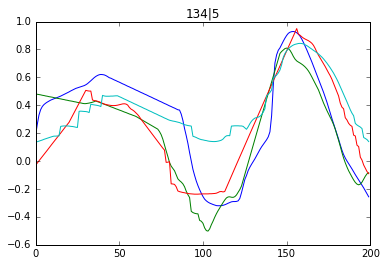

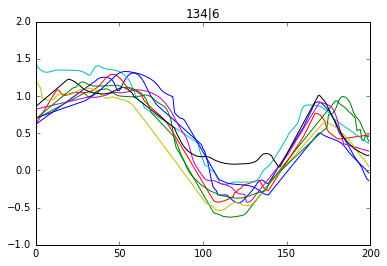

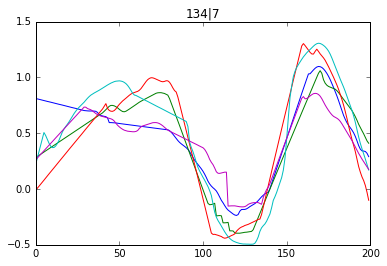

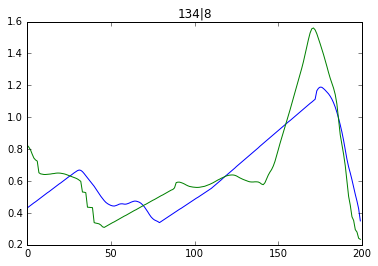

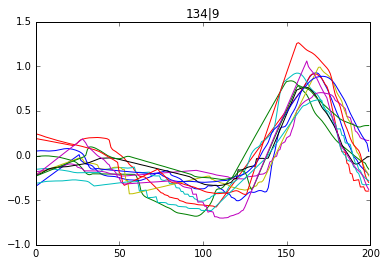

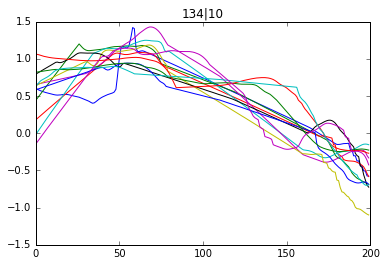

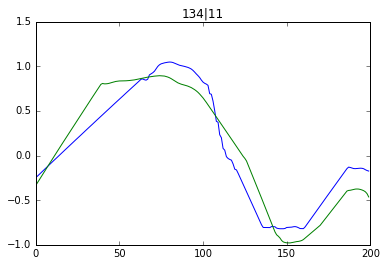

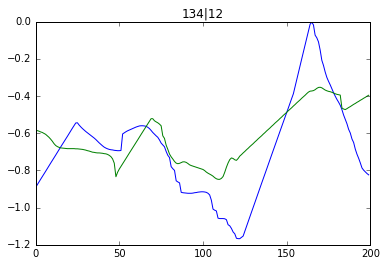

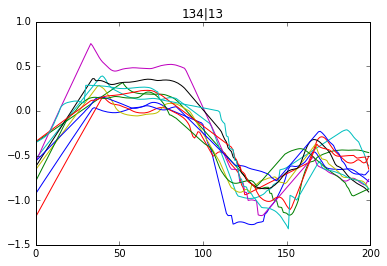

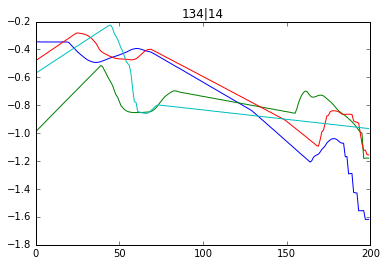

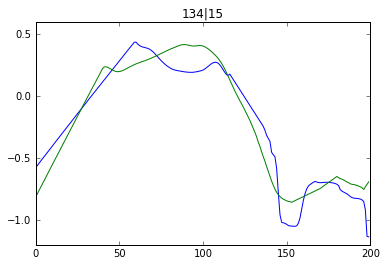

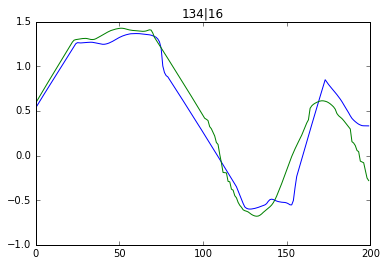

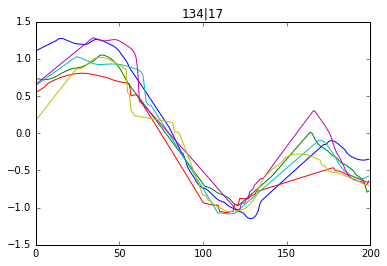

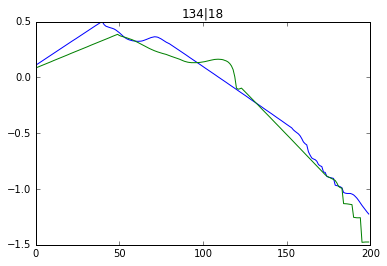

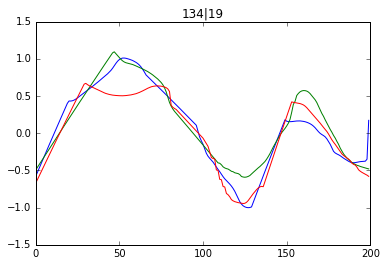

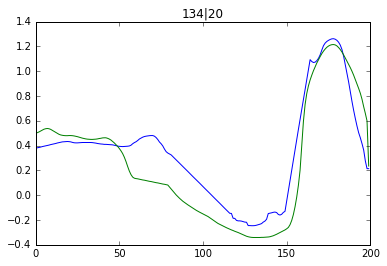

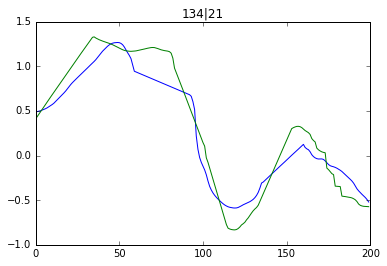

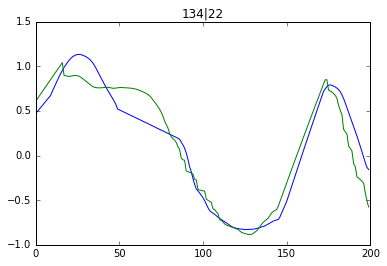

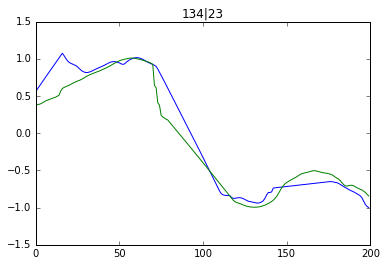

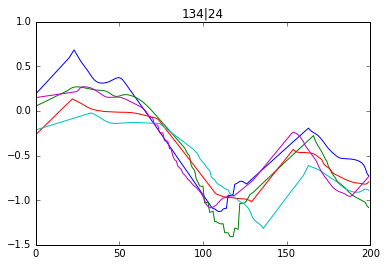

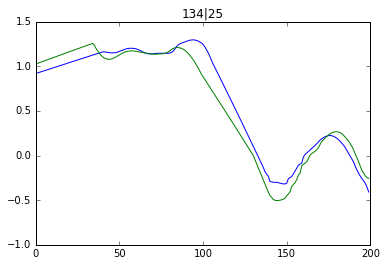

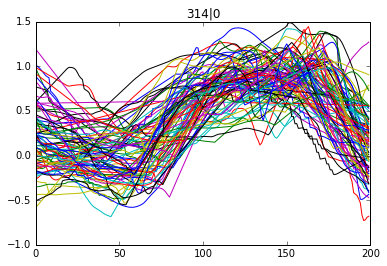

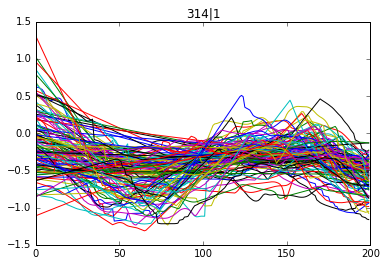

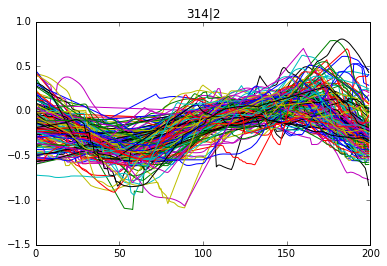

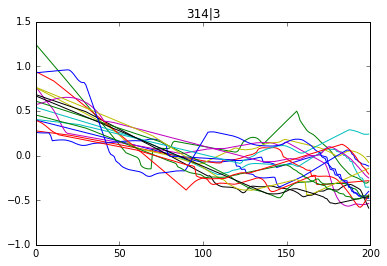

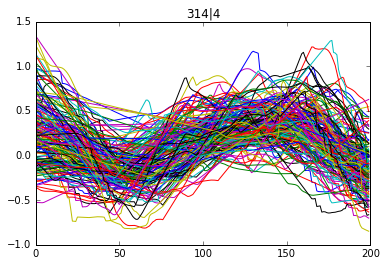

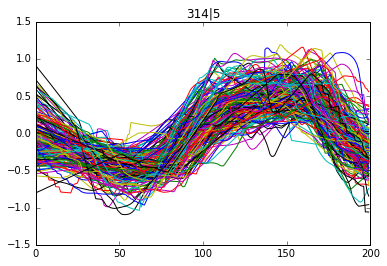

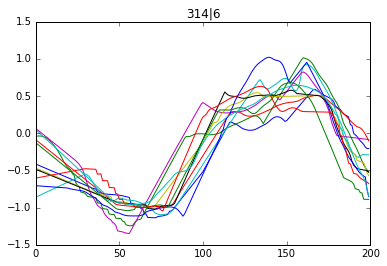

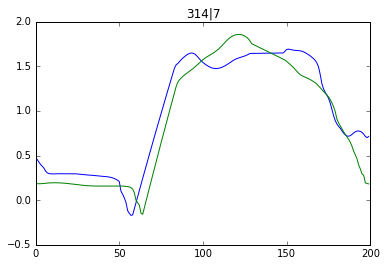

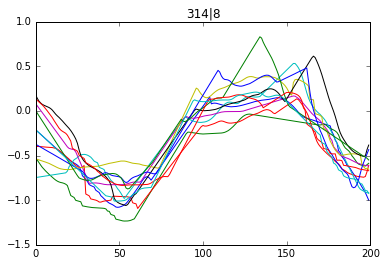

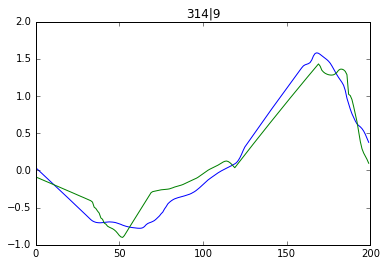

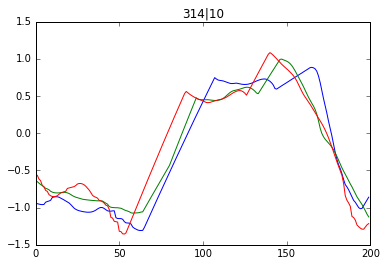

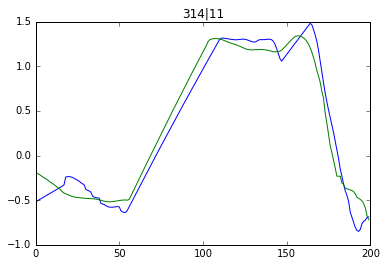

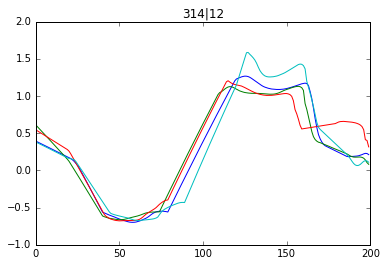

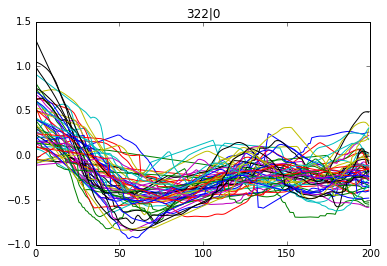

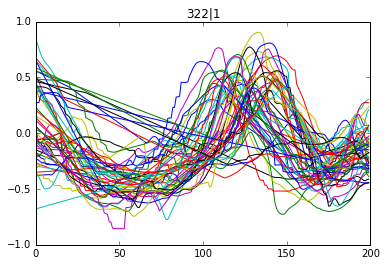

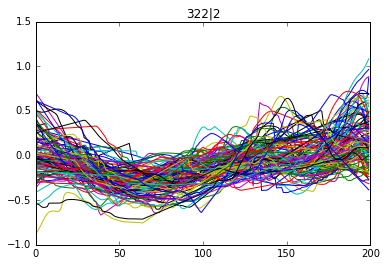

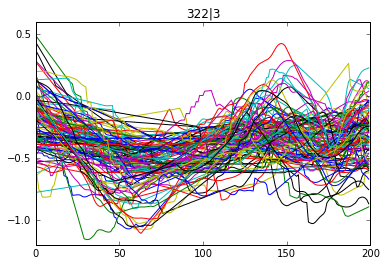

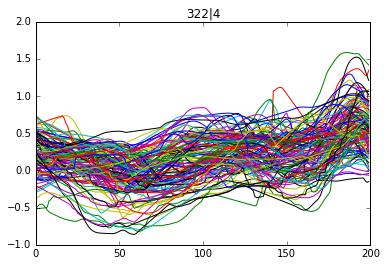

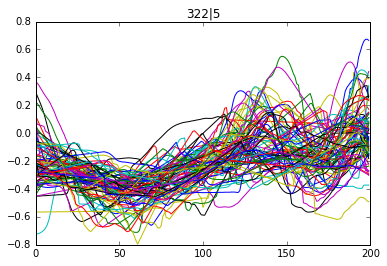

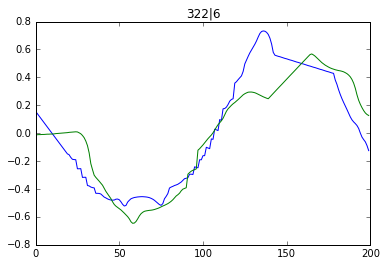

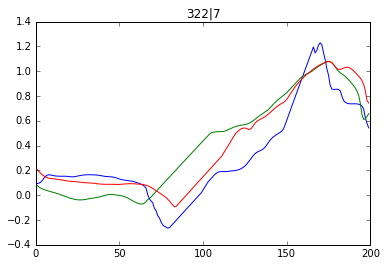

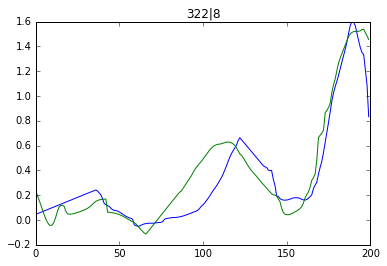

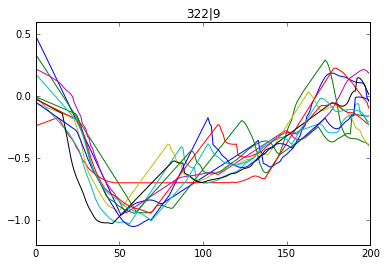

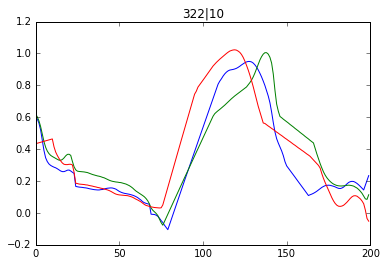

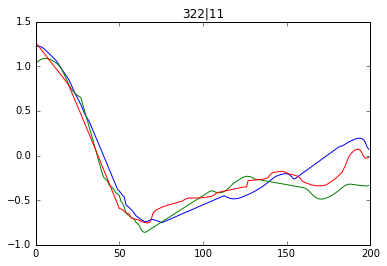

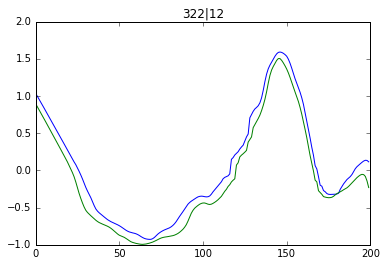

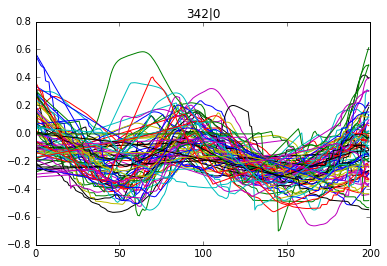

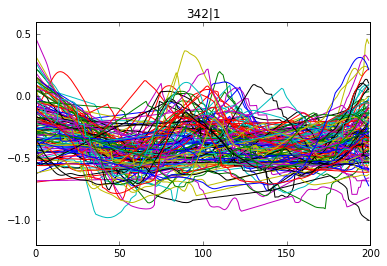

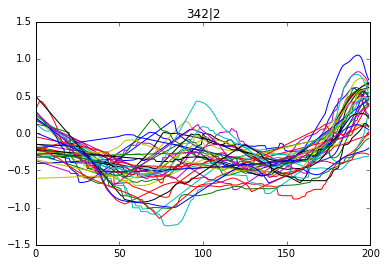

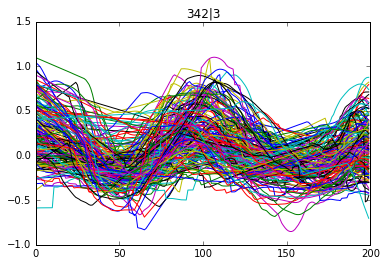

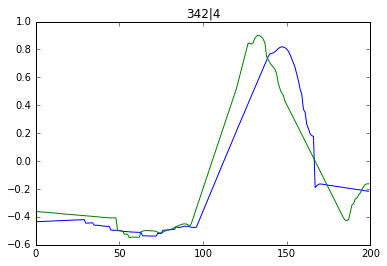

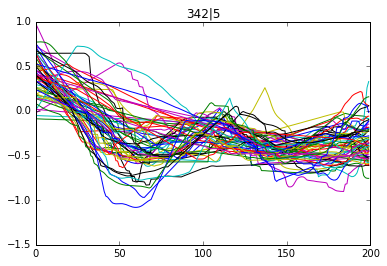

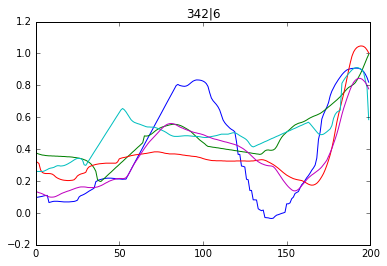

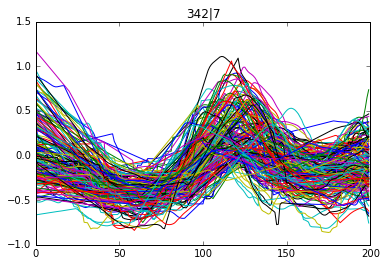

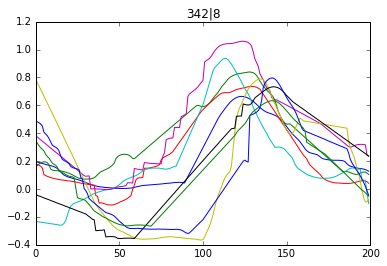

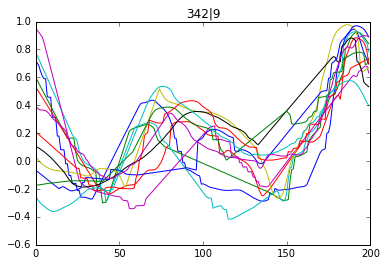

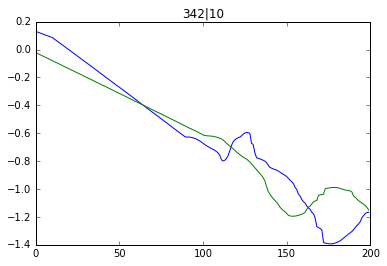

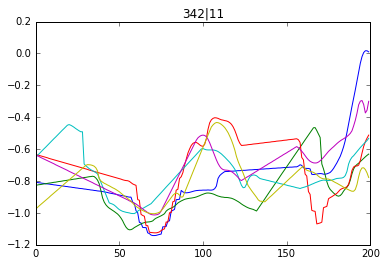

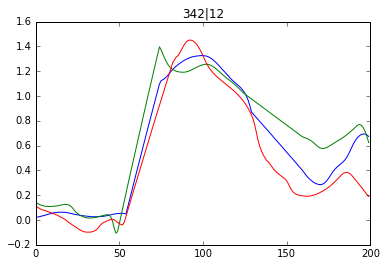

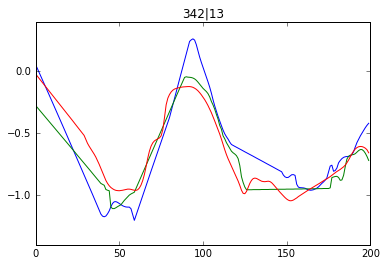

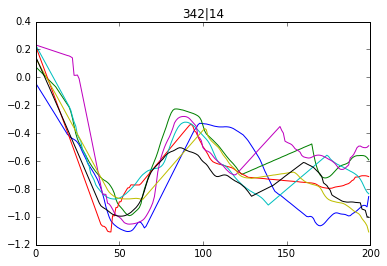

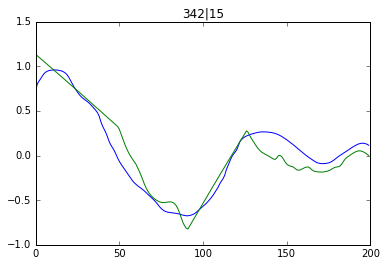

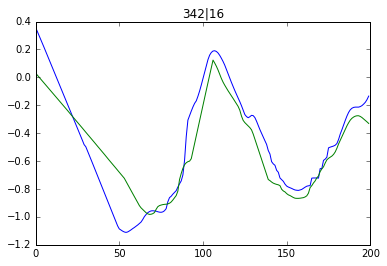

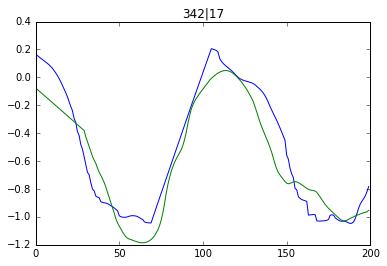

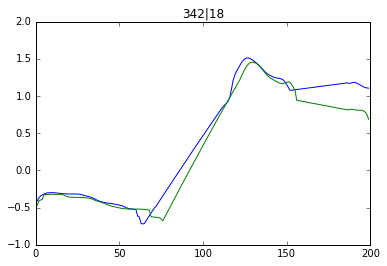

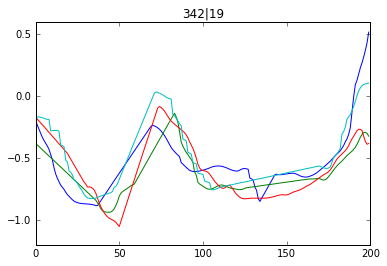

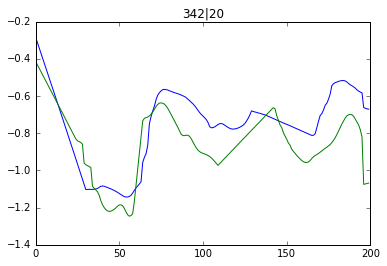

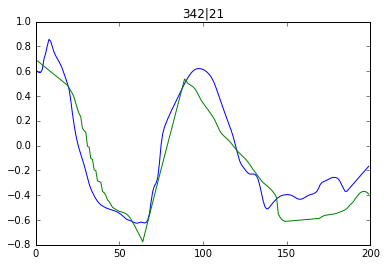

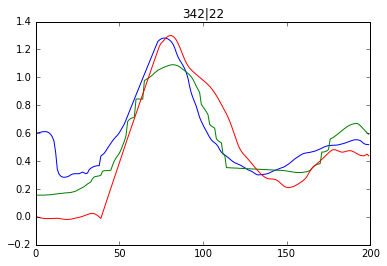

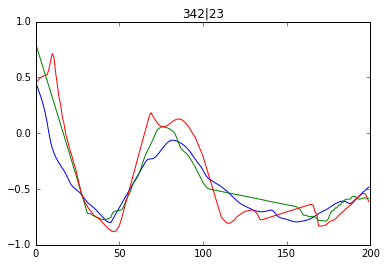

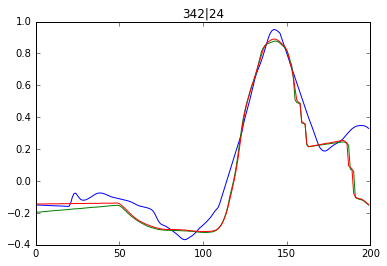

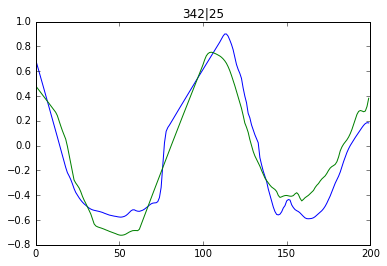

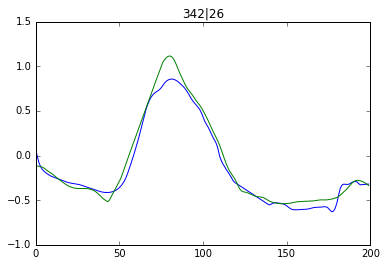

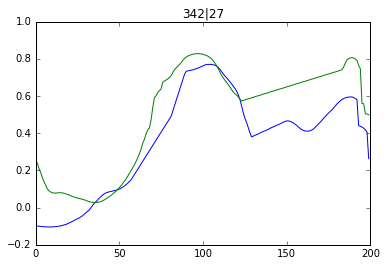

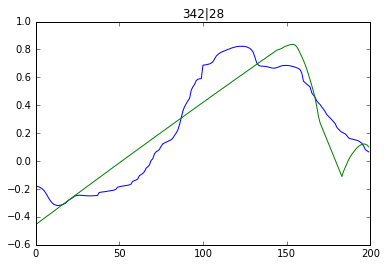

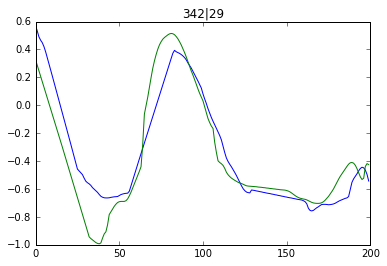

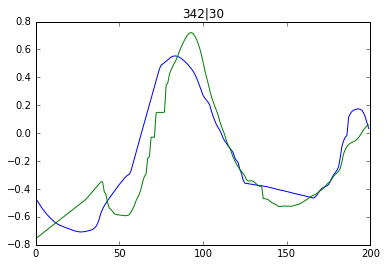

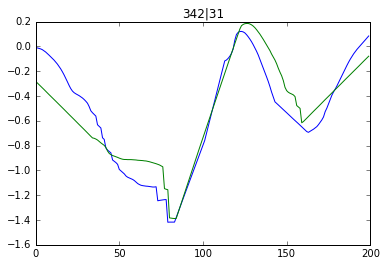

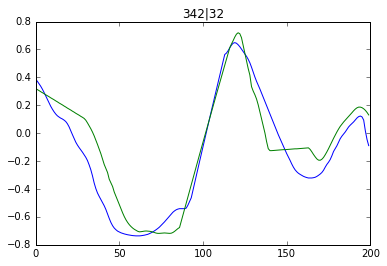

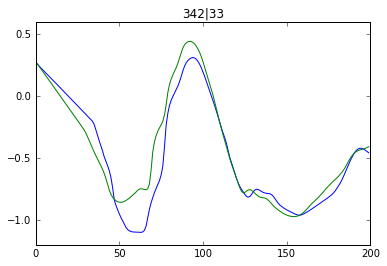

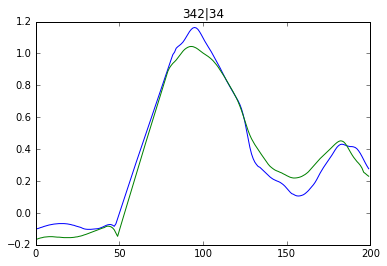

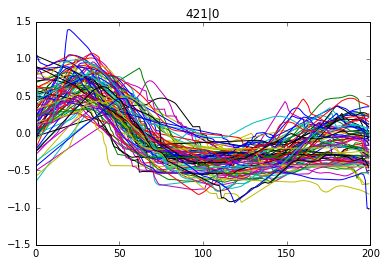

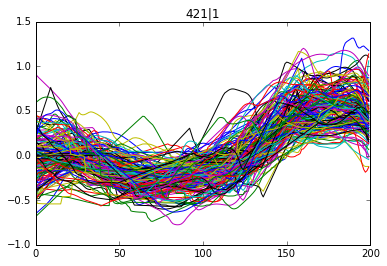

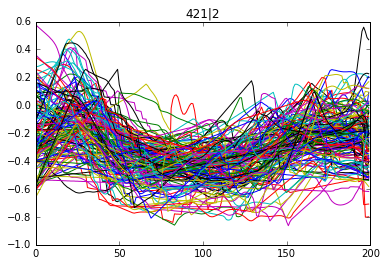

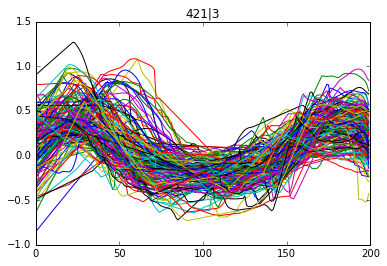

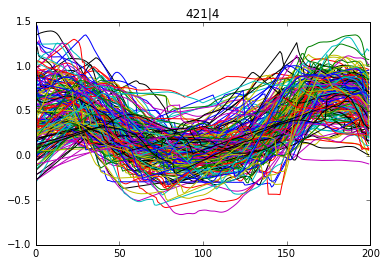

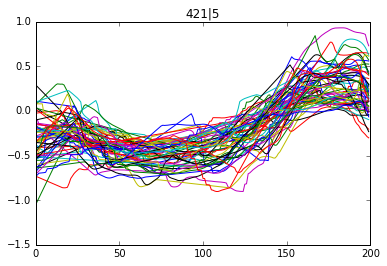

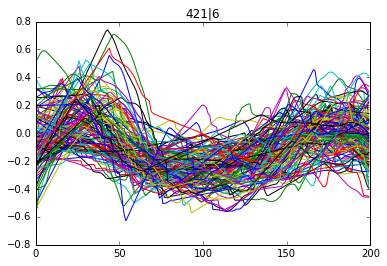

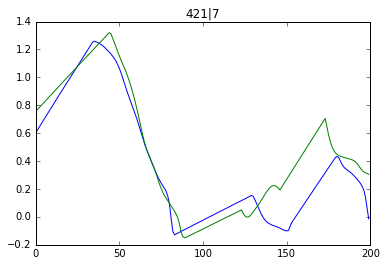

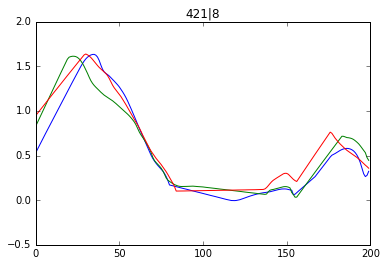

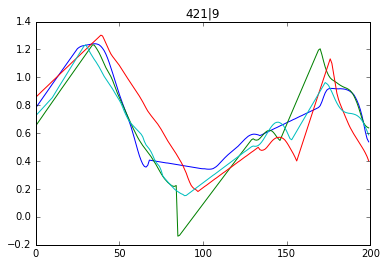

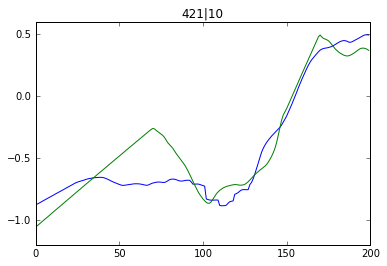

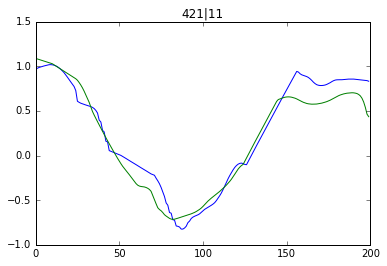

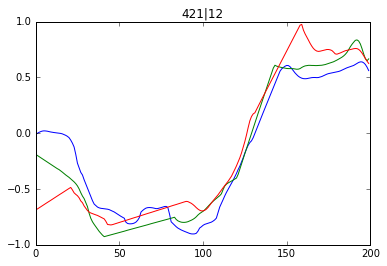

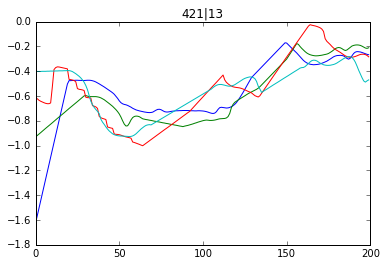

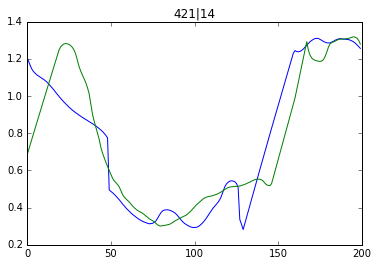

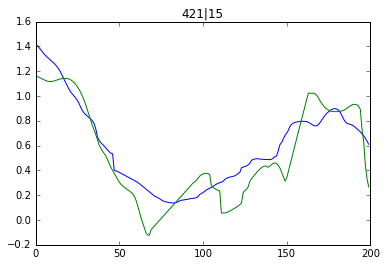

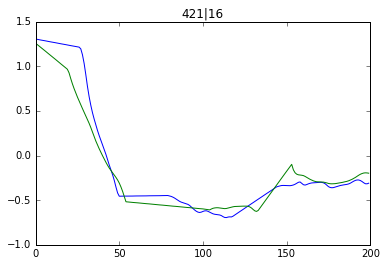

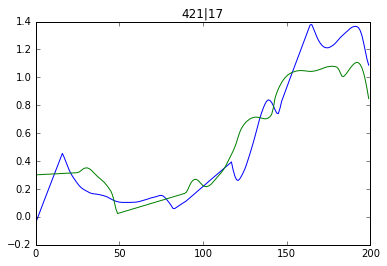

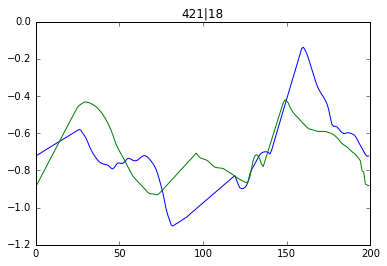

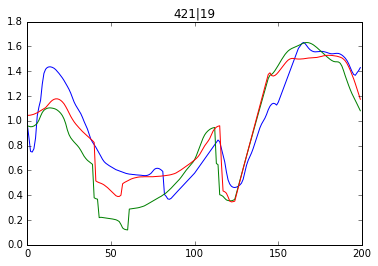

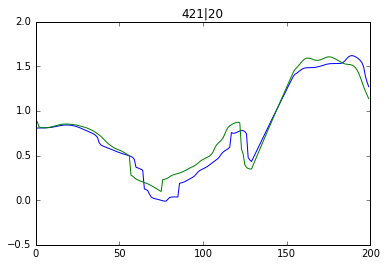

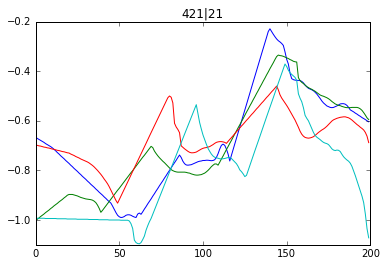

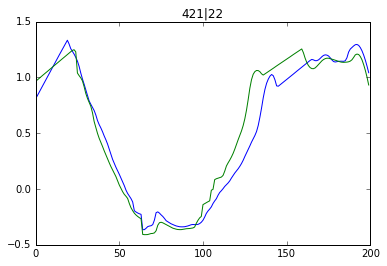

In [35]:
from os import listdir
#pfile='downsample_syl_3_meta_200_421_pkl_part.pkl'\
path='core_subdata/'
pfiles = [ f for f in listdir(path) if f.endswith('_part.pkl')]


for p in pfiles:
    print '---------', p
    csv_file='subdata/'+p.replace('_pkl_part.pkl','.csv')
    plot_clusters(path,p,csv_file)

## Conclusion

The result above is not totally exact (there maybe rooms for getting more precise/similar subshapes), but they do make sense. in any case, the thresholds are derived from a principled and previously published method, so we can take this as is for now (don't let intuition ruin your progress).big clusters has more variants, small ones are quite closely matched. To see that these are the different types of shapes that a tone ngram has produced, it is still quite extraordinary. But at the same time we may doubt that are these the established shapes that can serve as classes for the basis of a classification task? or are they somewhat still random? I think coming from a big data, these shapes are robust enough for now. There are many classes indeed so the results won't be very good probably. But my conclusion is that we could give this a try.

# plans

1. compare uni-gram with ngram in terms of classification results
2. some classes are too small - there is a serious imbalance. Large classes tend to be a bit noisy.
3. crucial part is how the feature is going to be: like the subjectNP feature, what is the unit for that feature? I think something along the line of binary or bag-of-prosody features in the prosody and coref paper:<b>Using prosodic annotations to improve coreference resolution of spoken text</b>

# evaluation of clusters/communities
4. still, there are some shortcomings of using this as class. First, the community detection is based on modularity, and doesn't necessarily mean the classes are maximally different. It is somewhat random in a sense. It is totally possible you need to combine some small clusters as they are quite similar. 
5. and again, it comes down to evaluation - currently there is no good way to evaluate quality of these clsuters derived from this method, or evaluate against another method. we need to think hard about this. Only after you performed this step and you know the clusters are reliable then you can use it in a classification task. Otherwise this is too random.

# evaluation plans and alternative methods to Louvain
1. we can use other community detection methods and evaluate against louvain. 
2. whatever method we evaluate, we need to have a way of evaluation. There are in general intrinsic and extrinsic evaluation. Intrinsic is mostly tightness of the clusters. IR book lists four extrinsic evaluations in IR applications. We can consider all of these. 
3. The lack of gold standard ground truth is a common problem in network community detection. Let's see a evaluation with gold standard here https://cs.stanford.edu/people/jure/pubs/comscore-icdm12.pdf.